## People Analytics Project: 

### Background/Introduction:

Attrition/Churn/Turnover Rate refers to the rate at which employees leave a company. Employee turnover is a costly problem for organizations. The cost of replacing an employee can be quite large, and a study found that companies typically pay about one-fifth of an employee's salary to replace them. 

The cost can significantly increase if executives or highest-paid employees are to be replaced. The cost of replacing employees for most employers remains significant. This is due to the amount of time spent to interview and find a replacement, sign-on bonuses, and the loss of productivity for several months while the new employee gets accustomed to the new role.

### What is HR/People/Talent/Workforce Analytics ?

HR/People/Talent/Workforce Analytics is the process of using data to make strategic decisions about an organization's workforce. It involves collecting, analyzing, and interpreting data from various sources such as HR systems, employee surveys, and performance metrics to gain insights into trends, patterns, and opportunities for improvement.

### Problem Statement:

To understand why and when employees are most likely to leave an oroganisation. This can help structure the actions to improve employee retention as well as possibly planning new hiring in advance. We will attempt to address the problem statement using the below questions:

1. What is the likelihood of an active employee leaving the company?
2. What are the key indicators of an employee leaving the company?
3. What policies or strategies can be adopted based on the results to improve employee retention?
   
Given that we have data on former employees, this is a standard supervised classification problem where the label is a binary variable, 0 (likely to stay), 1 (likely to leave). In this study, our target variable Y is the probability of an employee leaving the company.

### Project Structure:

 - Data Exploration:

 - Exploratory Data Analysis (EDA):(To View distribtion, summary, skewness and visualisation) 

 - Data Preprocessing: (Scaling and Encoding)

 - Feature Selection using A/B Testing: (ANOVA and Chi-Square)

 - Model Training and Development:

 - Logging metrics, parameters and model artificats using Databricks Mlflow for reproducibility.  

 - Model Evaluation using Classification Report & Confusion matrix 

 - Model Explainabity using SHAP Values: 

 - Best Model, Conclusion and Further Recommendations:  

### Data Exploration:

In this case study, a HR dataset was sourced from IBM HR Analytics Employee Attrition & Performance which contains employee data for 1,470 employees with various information about the employees. I will use this dataset to predict when employees are going to quit by understanding the main drivers of employee churn.

As stated on the IBM website "This is a fictional data set created by IBM data scientists". Its main purpose was to demonstrate the IBM Watson Analytics tool for employee attrition.

### Dataset Source:

The IBM HR Analytics Employee Attrition & Performance dataset is used for this project. It can be found at https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

#### Importing Libraries/Modules

We will import all the required libraries and modules required for our project as follows:

In [0]:
#importing libraries for data handling and analysis
import pandas as pd
import numpy as np

#importing libraries for data visualisations
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
import plotly.express as px

#importing warnings to avoid any future warnings
import warnings

# ml libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 

In [0]:
%fs ls /FileStore/tables/


path name size modificationTime dbfs:/FileStore/tables/Credit_Card_Fraud_Detection_System_3.ipynb Credit_Card_Fraud_Detection_System_3.ipynb 958387 1748492462000 dbfs:/FileStore/tables/Ecommerce_Walmart_Customer_Segmentation_with_MLflow-1.ipynb Ecommerce_Walmart_Customer_Segmentation_with_MLflow-1.ipynb 1391945 1748409918000 dbfs:/FileStore/tables/Ecommerce_Walmart_Customer_Segmentation_with_MLflow.ipynb Ecommerce_Walmart_Customer_Segmentation_with_MLflow.ipynb 1391945 1748409762000 dbfs:/FileStore/tables/Employee_Attrition_data/ Employee_Attrition_data/ 0 0 dbfs:/FileStore/tables/HR_Employee_Attrition.csv HR_Employee_Attrition.csv 227977 1748735797000 dbfs:/FileStore/tables/WA_Fn_UseC__HR_Employee_Attrition-1.csv WA_Fn_UseC__HR_Employee_Attrition-1.csv 227977 1748735373000 dbfs:/FileStore/tables/WA_Fn_UseC__HR_Employee_Attrition.csv WA_Fn_UseC__HR_Employee_Attrition.csv 227977 1748729610000 dbfs:/FileStore/tables/Walmart_customer_purchases.csv Walmart_customer_purchases.csv 5680977 1748409213000

### Data Importing:

Let us import the dataset using spark to know what the data contains.

 Spark is an open-source, distributed big data processing framework designed for fast computation and scalable analytics.

In [0]:
df = spark.read.csv("/FileStore/tables/HR_Employee_Attrition.csv", header=True, inferSchema=True)



In [0]:
# Count rows
num_rows = df.count()

# Count columns
num_cols = len(df.columns)

print(f"Total Rows: {num_rows}")
print(f"Total Columns: {num_cols}")


Total Rows: 1470
Total Columns: 35


#### Exploratory Data Analysis: 

The Dataset has 1470 records and 35 fields. Lets explore further and see their data types and uniformity. 

In [0]:
display(df) 

Age Attrition BusinessTravel DailyRate Department DistanceFromHome Education EducationField EmployeeCount EmployeeNumber EnvironmentSatisfaction Gender HourlyRate JobInvolvement JobLevel JobRole JobSatisfaction MaritalStatus MonthlyIncome MonthlyRate NumCompaniesWorked Over18 OverTime PercentSalaryHike PerformanceRating RelationshipSatisfaction StandardHours StockOptionLevel TotalWorkingYears TrainingTimesLastYear WorkLifeBalance YearsAtCompany YearsInCurrentRole YearsSinceLastPromotion YearsWithCurrManager 41 Yes Travel_Rarely 1102 Sales 1 2 Life Sciences 1 1 2 Female 94 3 2 Sales Executive 4 Single 5993 19479 8 Y Yes 11 3 1 80 0 8 0 1 6 4 0 5 49 No Travel_Frequently 279 Research & Development 8 1 Life Sciences 1 2 3 Male 61 2 2 Research Scientist 2 Married 5130 24907 1 Y No 23 4 4 80 1 10 3 3 10 7 1 7 37 Yes Travel_Rarely 1373 Research & Development 2 2 Other 1 4 4 Male 92 2 1 Laboratory Technician 3 Single 2090 2396 6 Y Yes 15 3 2 80 0 7 3 3 0 0 0 0 33 No Travel_Frequently 1392 Research & Development 3 4 Life Sciences 1 5 4 Female 56 3 1 Research Scientist 3 Married 2909 23159 1 Y Yes 11 3 3 80 0 8 3 3 8 7 3 0 27 No Travel_Rarely 591 Research & Development 2 1 Medical 1 7 1 Male 40 3 1 Laboratory Technician 2 Married 3468 16632 9 Y No 12 3 4 80 1 6 3 3 2 2 2 2 32 No Travel_Frequently 1005 Research & Development 2 2 Life Sciences 1 8 4 Male 79 3 1 Laboratory Technician 4 Single 3068 11864 0 Y No 13 3 3 80 0 8 2 2 7 7 3 6 59 No Travel_Rarely 1324 Research & Development 3 3 Medical 1 10 3 Female 81 4 1 Laboratory Technician 1 Married 2670 9964 4 Y Yes 20 4 1 80 3 12 3 2 1 0 0 0 30 No Travel_Rarely 1358 Research & Development 24 1 Life Sciences 1 11 4 Male 67 3 1 Laboratory Technician 3 Divorced 2693 13335 1 Y No 22 4 2 80 1 1 2 3 1 0 0 0 38 No Travel_Frequently 216 Research & Development 23 3 Life Sciences 1 12 4 Male 44 2 3 Manufacturing Director 3 Single 9526 8787 0 Y No 21 4 2 80 0 10 2 3 9 7 1 8 36 No Travel_Rarely 1299 Research & Development 27 3 Medical 1 13 3 Male 94 3 2 Healthcare Representative 3 Married 5237 16577 6 Y No 13 3 2 80 2 17 3 2 7 7 7 7 35 No Travel_Rarely 809 Research & Development 16 3 Medical 1 14 1 Male 84 4 1 Laboratory Technician 2 Married 2426 16479 0 Y No 13 3 3 80 1 6 5 3 5 4 0 3 29 No Travel_Rarely 153 Research & Development 15 2 Life Sciences 1 15 4 Female 49 2 2 Laboratory Technician 3 Single 4193 12682 0 Y Yes 12 3 4 80 0 10 3 3 9 5 0 8 31 No Travel_Rarely 670 Research & Development 26 1 Life Sciences 1 16 1 Male 31 3 1 Research Scientist 3 Divorced 2911 15170 1 Y No 17 3 4 80 1 5 1 2 5 2 4 3 34 No Travel_Rarely 1346 Research & Development 19 2 Medical 1 18 2 Male 93 3 1 Laboratory Technician 4 Divorced 2661 8758 0 Y No 11 3 3 80 1 3 2 3 2 2 1 2 28 Yes Travel_Rarely 103 Research & Development 24 3 Life Sciences 1 19 3 Male 50 2 1 Laboratory Technician 3 Single 2028 12947 5 Y Yes 14 3 2 80 0 6 4 3 4 2 0 3 29 No Travel_Rarely 1389 Research & Development 21 4 Life Sciences 1 20 2 Female 51 4 3 Manufacturing Director 1 Divorced 9980 10195 1 Y No 11 3 3 80 1 10 1 3 10 9 8 8 32 No Travel_Rarely 334 Research & Development 5 2 Life Sciences 1 21 1 Male 80 4 1 Research Scientist 2 Divorced 3298 15053 0 Y Yes 12 3 4 80 2 7 5 2 6 2 0 5 22 No Non-Travel 1123 Research & Development 16 2 Medical 1 22 4 Male 96 4 1 Laboratory Technician 4 Divorced 2935 7324 1 Y Yes 13 3 2 80 2 1 2 2 1 0 0 0 53 No Travel_Rarely 1219 Sales 2 4 Life Sciences 1 23 1 Female 78 2 4 Manager 4 Married 15427 22021 2 Y No 16 3 3 80 0 31 3 3 25 8 3 7 38 No Travel_Rarely 371 Research & Development 2 3 Life Sciences 1 24 4 Male 45 3 1 Research Scientist 4 Single 3944 4306 5 Y Yes 11 3 3 80 0 6 3 3 3 2 1 2 24 No Non-Travel 673 Research & Development 11 2 Other 1 26 1 Female 96 4 2 Manufacturing Director 3 Divorced 4011 8232 0 Y No 18 3 4 80 1 5 5 2 4 2 1 3 36 Yes Travel_Rarely 1218 Sales 9 4 Life Sciences 1 27 3 Male 82 2 1 Sales Representative 1 Single 3407 6986 7 Y No 23 4 2 80 0 10 4 3 5 3 0 3 34 No Travel_Rarely 419 Research & Develop

In [0]:
df.printSchema()


root
 |-- Age: integer (nullable = true)
 |-- Attrition: string (nullable = true)
 |-- BusinessTravel: string (nullable = true)
 |-- DailyRate: integer (nullable = true)
 |-- Department: string (nullable = true)
 |-- DistanceFromHome: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- EducationField: string (nullable = true)
 |-- EmployeeCount: integer (nullable = true)
 |-- EmployeeNumber: integer (nullable = true)
 |-- EnvironmentSatisfaction: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- HourlyRate: integer (nullable = true)
 |-- JobInvolvement: integer (nullable = true)
 |-- JobLevel: integer (nullable = true)
 |-- JobRole: string (nullable = true)
 |-- JobSatisfaction: integer (nullable = true)
 |-- MaritalStatus: string (nullable = true)
 |-- MonthlyIncome: integer (nullable = true)
 |-- MonthlyRate: integer (nullable = true)
 |-- NumCompaniesWorked: integer (nullable = true)
 |-- Over18: string (nullable = true)
 |-- OverTime: string 

The Dataset has mix of integer and string types. 

In PySpark, the printSchema() function is used to display the schema (i.e., structure) of a DataFrame in a tree format, showing column names, data types, and nullability. 

In [0]:
from pyspark.sql.functions import col, sum as _sum

null_counts = df.select([_sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
# Convert to two-column format
transposed = (
    null_counts
    .toPandas()
    .T.reset_index()
    .rename(columns={"index": "Column", 0: "Null_Count"})
    .sort_values(by="Null_Count", ascending=False)
)

display(transposed)


Column Null_Count Age 0 StandardHours 0 NumCompaniesWorked 0 Over18 0 OverTime 0 PercentSalaryHike 0 PerformanceRating 0 RelationshipSatisfaction 0 StockOptionLevel 0 MonthlyIncome 0 TotalWorkingYears 0 TrainingTimesLastYear 0 WorkLifeBalance 0 YearsAtCompany 0 YearsInCurrentRole 0 YearsSinceLastPromotion 0 MonthlyRate 0 MaritalStatus 0 Attrition 0 EmployeeCount 0 BusinessTravel 0 DailyRate 0 Department 0 DistanceFromHome 0 Education 0 EducationField 0 EmployeeNumber 0 JobSatisfaction 0 EnvironmentSatisfaction 0 Gender 0 HourlyRate 0 JobInvolvement 0 JobLevel 0 JobRole 0 YearsWithCurrManager 0

In [0]:
df.select([c for c, t in df.dtypes if t in ('int', 'double', 'float')]).describe().display()


summary Age DailyRate DistanceFromHome Education EmployeeCount EmployeeNumber EnvironmentSatisfaction HourlyRate JobInvolvement JobLevel JobSatisfaction MonthlyIncome MonthlyRate NumCompaniesWorked PercentSalaryHike PerformanceRating RelationshipSatisfaction StandardHours StockOptionLevel TotalWorkingYears TrainingTimesLastYear WorkLifeBalance YearsAtCompany YearsInCurrentRole YearsSinceLastPromotion YearsWithCurrManager count 1470 1470 1470 1470 1470 1470 1470 1470 1470 1470 1470 1470 1470 1470 1470 1470 1470 1470 1470 1470 1470 1470 1470 1470 1470 1470 mean 36.923809523809524 802.4857142857143 9.19251700680272 2.912925170068027 1.0 1024.865306122449 2.721768707482993 65.89115646258503 2.7299319727891156 2.0639455782312925 2.7285714285714286 6502.931292517007 14313.103401360544 2.6931972789115646 15.209523809523809 3.1537414965986397 2.7122448979591836 80.0 0.7938775510204081 11.279591836734694 2.7993197278911564 2.7612244897959184 7.0081632653061225 4.229251700680272 2.1877551020408164 4.12312925170068 stddev 9.135373489136729 403.50909994352804 8.10686443566608 1.0241649445978718 0.0 602.0243348474752 1.0930822146350003 20.329427593996176 0.7115611429632297 1.1069398989351202 1.1028461230547213 4707.956783097992 7117.786044059972 2.4980090060707463 3.6599377165396385 0.36082352460434397 1.0812088864403517 0.0 0.8520766679308381 7.780781675514995 1.2892706207958466 0.7064758297141507 6.126525152403571 3.623137034670627 3.2224302791379693 3.5681361205404363 min 18 102 1 1 1 1 1 30 1 1 1 1009 2094 0 11 3 1 80 0 0 0 1 0 0 0 0 max 60 1499 29 5 1 2068 4 100 4 5 4 19999 26999 9 25 4 4 80 3 40 6 4 40 18 15 17

##### Key Observations and Insights:

Mean and standard deviation (stddev) help us assess whether the data is centered or skewed. Useful for guiding normalization and standardization, ensuring all variables operate on a consistent scale for modeling.

- *Age (18–60)*

Indicates presence of both young entrants and senior professionals.

Key Questions to ask: 
Are younger employees more likely to leave (attrition)?
Are older employees concentrated in specific departments?

- *DailyRate: High Variation*

Mean: ~802; Stddev: ~403 → ~50% of mean, indicating wide income disparity.

Use Cases:
Equity analysis
Pay gap investigations
Outlier detection for unfair compensation patterns

- *NumCompaniesWorked: Wide Experience Spread*

Range: 0–9; Stddev: 2.5 → some freshers, others highly experienced.

Investigation Area:
Do employees with more job switches tend to leave more?
Are these individuals harder to retain?

- *Promotion Stagnation:*

Some employees have 15+ years without promotion.

Investigation Area:
Which departments/roles face long-term stagnation?
Is lack of advancement contributing to attrition?

- *StockOptionLevel (0–3):*

Mean: ~0.79; Stddev: ~0.85 → most employees receive none or low options.

Key Considerations:
Relationship between stock options and employee motivation/retention
Departmental or role-based disparities in distribution

- *JobSatisfaction:*

Employees reporting low scores (1 or 2) are a significant minority.

Key Questions:
Which departments have the lowest satisfaction?
How does dissatisfaction correlate with attrition?

- *DistanceFromHome: Long Commutes*

Max: 29 km; Mean: ~9.2 km; Stddev: ~8.1 km

Key Questions:
Are those with longer commutes more likely to leave?
Could flexible/hybrid options reduce attrition risk?

- *No Promotions in 3–4 Year Tenure Group*

25% of employees with 3–4 years tenure have had no promotions.

Investigation Points:
Is this group showing higher attrition?
Are systemic issues delaying promotions (e.g., unclear paths, manager bias)?  

- *TrainingtimesLastYear*

Indicates that standard deviation does not vary much from mean and some employyes are either no receiving them at all. 

Lets validate the insights we have got from summary stas using frequency plots against attrtions , counts (Attrition/ No Attrition), Chi Sqaure and ANOVA Testing, to check if there are evidences, if these can impact our final model performance and we need futher change in HR Policies to improve retetion of employees.  


In [0]:

df.groupBy("Department", "JobSatisfaction").count().show()


+--------------------+---------------+-----+
|          Department|JobSatisfaction|count|
+--------------------+---------------+-----+
|     Human Resources|              3|   15|
|Research & Develo...|              1|  192|
|     Human Resources|              2|   20|
|               Sales|              4|  147|
|               Sales|              3|  127|
|     Human Resources|              4|   17|
|               Sales|              1|   86|
|Research & Develo...|              4|  295|
|Research & Develo...|              3|  300|
|               Sales|              2|   86|
|Research & Develo...|              2|  174|
|     Human Resources|              1|   11|
+--------------------+---------------+-----+



Data indicates that employees in Research & Development, Sales, and Human Resources departments predominantly fall into low satisfaction levels (1 and 2), while other departments lean toward higher satisfaction levels (3 and 4).

A total of 570 employees (39%) report low to moderate satisfaction, which is a substantial segment that may influence attrition, productivity, and employee engagement.

To assess whether department is significantly associated with attrition, we will perform a Chi-Square test of independence


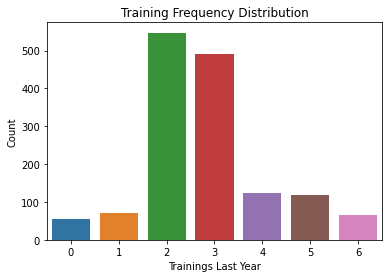

+---------------------+---------+-----+
|TrainingTimesLastYear|Attrition|count|
+---------------------+---------+-----+
|                    0|       No|   39|
|                    0|      Yes|   15|
|                    1|       No|   62|
|                    1|      Yes|    9|
|                    2|       No|  449|
|                    2|      Yes|   98|
|                    3|      Yes|   69|
|                    3|       No|  422|
|                    4|       No|   97|
|                    4|      Yes|   26|
|                    5|       No|  105|
|                    5|      Yes|   14|
|                    6|       No|   59|
|                    6|      Yes|    6|
+---------------------+---------+-----+



In [0]:
import seaborn as sns
sns.countplot(x="TrainingTimesLastYear", data=df.toPandas())
plt.title("Training Frequency Distribution")
plt.xlabel("Trainings Last Year")
plt.ylabel("Count")
plt.show()

df.groupBy("TrainingTimesLastYear", "Attrition").count().orderBy("TrainingTimesLastYear").show()



Most employees receive 2–3 trainings per year, but a notable portion receive none or many.
Strategically valuable for HR to monitor who gets how much training and why.

**Performing ANOVA- Test to check stastistical significance between all numerical variables and target categorical variables Attrition.**

In [0]:
from scipy.stats import f_oneway

# Select numeric columns and convert to Pandas
num_cols = [c for c, t in df.dtypes if t in ('int', 'double', 'float')]
pdf = df.select(['Attrition'] + num_cols).toPandas()

# Run ANOVA in one loop
anova = [(c, *f_oneway(*[g[c].dropna() for _, g in pdf.groupby('Attrition') if len(g) > 1]))
         for c in num_cols]

# Display sorted results
import pandas as pd
anova_df = pd.DataFrame(anova, columns=['Column', 'pValue', 'F_Stat']).sort_values(by='pValue')
spark.createDataFrame(anova_df).show(truncate=False)

/databricks/python/lib/python3.9/site-packages/scipy/stats/stats.py:3650: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())
/databricks/python/lib/python3.9/site-packages/scipy/stats/stats.py:3650: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


+------------------------+--------------------+---------------------+
|Column                  |pValue              |F_Stat               |
+------------------------+--------------------+---------------------+
|PerformanceRating       |0.012250395534223307|0.9118840421067758   |
|HourlyRate              |0.06879597773678614 |0.7931347689944519   |
|EmployeeNumber          |0.1642553750949558  |0.685327589729904    |
|PercentSalaryHike       |0.266728168623382   |0.6056128238894396   |
|MonthlyRate             |0.3379164577081446  |0.5611235982243229   |
|Education               |1.4463081305523098  |0.2293152033222874   |
|YearsSinceLastPromotion |1.6022184053056754  |0.2057899591624541   |
|NumCompaniesWorked      |2.78228670165566    |0.09552526205649159  |
|RelationshipSatisfaction|3.0955763595800705  |0.07871363048465917  |
|DailyRate               |4.726639837649271   |0.02985816066026101  |
|TrainingTimesLastYear   |5.211646072556778   |0.02257849973719727  |
|WorkLifeBalance    

The Above table identifies which features show significant differences in means between employees who stayed vs those who left (i.e., predictive features for attrition). 

Most Significant Variables (p < 0.05):
BusinessTravel_idx and PerformanceRating

Worth Watching (borderline):
HourlyRate, Department_idx and DistanceFromHome (though surprising, may still be useful in non-parametric models)

Lets Consider dropping other features due to their lower to none impact towards our target variable.  

Employees from Sales, R&D, and HR are showing higher attrition, likely driven by factors such as frequent business travel, low performance ratings, lack of promotions, hourly rate disparities, and greater distance from home.

Other variables show high p-values and low F-statistics, indicating limited impact on attrition.

We'll focus on these key features and create visualizations (correlation heatmaps, boxplots, scatterplots) to explore their relationships and support further modeling.

In [0]:
from pyspark.sql.functions import col, trim, length, when, sum as _sum

# Count only empty or whitespace-only strings (excluding nulls)
empty_whitespace_counts = df.select([
    _sum(
        when(
            (col(c).isNotNull()) & ((trim(col(c)) == "") | (length(trim(col(c))) == 0)),
            1
        ).otherwise(0)
    ).alias(c) for c in df.columns
])

# Convert to tabular format
result = (
    empty_whitespace_counts
    .toPandas()
    .T.reset_index()
    .rename(columns={"index": "Column", 0: "Empty_Or_Whitespace_Count"})
    .sort_values(by="Empty_Or_Whitespace_Count", ascending=False)
)

display(result)


Column Empty_Or_Whitespace_Count Age 0 StandardHours 0 NumCompaniesWorked 0 Over18 0 OverTime 0 PercentSalaryHike 0 PerformanceRating 0 RelationshipSatisfaction 0 StockOptionLevel 0 MonthlyIncome 0 TotalWorkingYears 0 TrainingTimesLastYear 0 WorkLifeBalance 0 YearsAtCompany 0 YearsInCurrentRole 0 YearsSinceLastPromotion 0 MonthlyRate 0 MaritalStatus 0 Attrition 0 EmployeeCount 0 BusinessTravel 0 DailyRate 0 Department 0 DistanceFromHome 0 Education 0 EducationField 0 EmployeeNumber 0 JobSatisfaction 0 EnvironmentSatisfaction 0 Gender 0 HourlyRate 0 JobInvolvement 0 JobLevel 0 JobRole 0 YearsWithCurrManager 0

It is important to check for empty strings, whitespaces, and special characters during data cleaning. 

Sometimes, numerical columns are mistakenly treated as strings due to the presence of such characters. These need to be identified and removed to correctly interpret the variable's meaning and assess its relationship with the target variable.

Cleaning this data ensures that important numerical features are not overlooked and can be effectively used in analysis and modeling.

#### Data Visualization Phase: 

*Lets Look at few patterns and trends from the dataset, data visualization helps us to easily interpret and analyse data. let's explore our dataset using Pyspark and Python's libraries for visualization like Matplotlib and seaborn.*  

#### DISTANCE FROM HOME VS ATTRITION: 

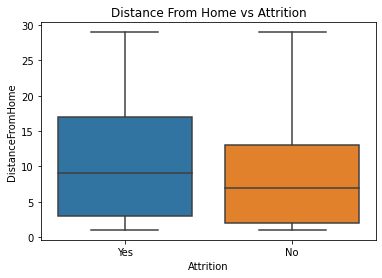

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Spark DataFrame to Pandas (only for relevant columns to save memory)
plot_df = df.select("Attrition", "DistanceFromHome").toPandas()

# Create the boxplot
sns.boxplot(x='Attrition', y='DistanceFromHome', data=plot_df)
plt.title('Distance From Home vs Attrition')
plt.show()


The plot suggests that while longer commutes may contribute to attrition, it is not a sole determinant, as many employees with long commutes have also stayed.

This insight supports including DistanceFromHome as a feature in our ML model, allowing the algorithm to learn its nuanced relationship with attrition.  

#### ATTRITION RATE BY DEPARTMENT AND BUSINESS TRAVEL

BusinessTravel          Non-Travel  Travel_Frequently  Travel_Rarely
Department                                                          
Human Resources           0.000000           0.363636       0.173913
Research & Development    0.082474           0.203297       0.129032
Sales                     0.085106           0.333333       0.190476


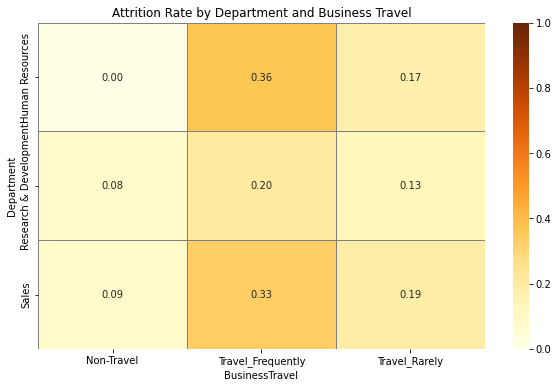

In [0]:
from pyspark.sql.functions import when, col, mean
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Fix Attrition_Flag column if not already binary
df = df.withColumn("Attrition_Flag", when(col("Attrition") == "Yes", 1).otherwise(0))

# Step 2: Group and aggregate
bt_dept = df.groupBy("Department", "BusinessTravel") \
            .agg(mean("Attrition_Flag").alias("AttritionRate")) \
            .toPandas()

# Step 3: Inspect pivot table for debugging
pivot = bt_dept.pivot(index="Department", columns="BusinessTravel", values="AttritionRate")
print(pivot)

# Step 4: Plot with safe color scale
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlOrBr", vmin=0, vmax=1, linewidths=0.5, linecolor='gray')
plt.title("Attrition Rate by Department and Business Travel")
plt.show()






The plot suggests that high attrition with Frequent Travel shows below attrtion rate for different departments. 

**Human Resources:** Attrition rate is **36.4%** among employees who travel frequently.

**Sales:** Attrition rate is **33.3%** for frequent travelers.

**R&D:** Attrition rate is **20.3%** for frequent travelers.


**Business travel is positively associated with attrition:Employees required to travel more frequently are more likely to leave, especially in HR and Sales.**

**Travel frequency may be a stressor or dissatisfaction factor, particularly in roles that are not typically field-based.**

**Departments with high attrition for frequent travelers may need to reassess travel policies or improve support systems.** 

#### Average Years Since last Promotion by Job Roles 

Out[14]: <module 'matplotlib.pyplot' from '/databricks/python/lib/python3.9/site-packages/matplotlib/pyplot.py'>

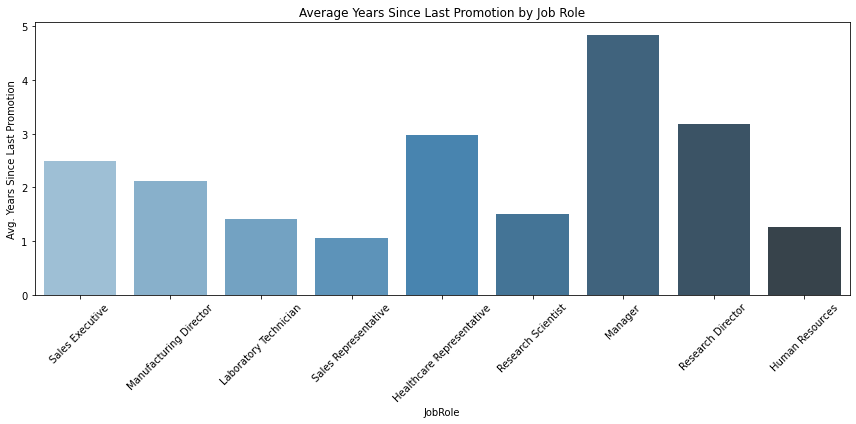

In [0]:
from pyspark.sql.functions import mean

# Aggregate in PySpark
promo_avg = df.groupBy("JobRole") \
              .agg(mean("YearsSinceLastPromotion").alias("AvgYears")) \
              .toPandas()

plt.figure(figsize=(12, 6))
sns.barplot(data=promo_avg, x="JobRole", y="AvgYears", palette="Blues_d")
plt.title("Average Years Since Last Promotion by Job Role")
plt.xticks(rotation=45)
plt.ylabel("Avg. Years Since Last Promotion")
plt.tight_layout()
plt 


Managers **(5 years)** and Healthcare Representatives **(3 years)** have the highest average years since last promotion.

This may indicate stagnation or slower career progression in these roles.

Moderate Delay:

Research Directors, Sales Executives, and Manufacturing Directors have an average of **2.5 to 3.5 years** since last promotion.

#### Years Since Last Promotion by Job Level and Attrition:

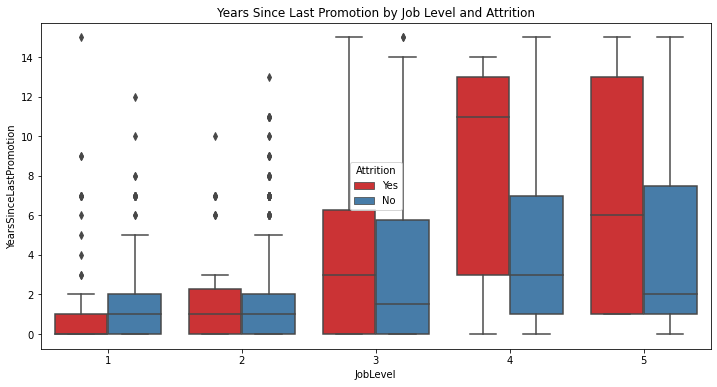

In [0]:
promo = df.select("YearsSinceLastPromotion", "JobLevel", "Attrition").toPandas()

plt.figure(figsize=(12, 6))
sns.boxplot(data=promo, x="JobLevel", y="YearsSinceLastPromotion", hue="Attrition", palette="Set1")
plt.title("Years Since Last Promotion by Job Level and Attrition")
plt.show()



**Job Levels 1–2 (Entry/Junior Roles):**

Most attrition cases (red) occur with very short times since last promotion (0–2 years).

Suggests these employees may leave early if growth expectations are unmet quickly.

**Job Levels 3–5 (Mid to Senior Roles):**

Employees who left (Attrition = Yes) have longer times without promotion, especially at Job Levels 4 and 5.

Attrition in senior roles is often linked to career stagnation, with some cases showing up to 14 years without promotion.

**Non-Attrition Cases (blue):**

These are more evenly distributed, often with lower or moderate promotion gaps.  

**YearsSinceLastPromotion** and its interaction with **JobLevel** should be considered as predictive features in your attrition model — they show a clear pattern of influence.  

> #### Job Role vs Performance Rating by Attrition 

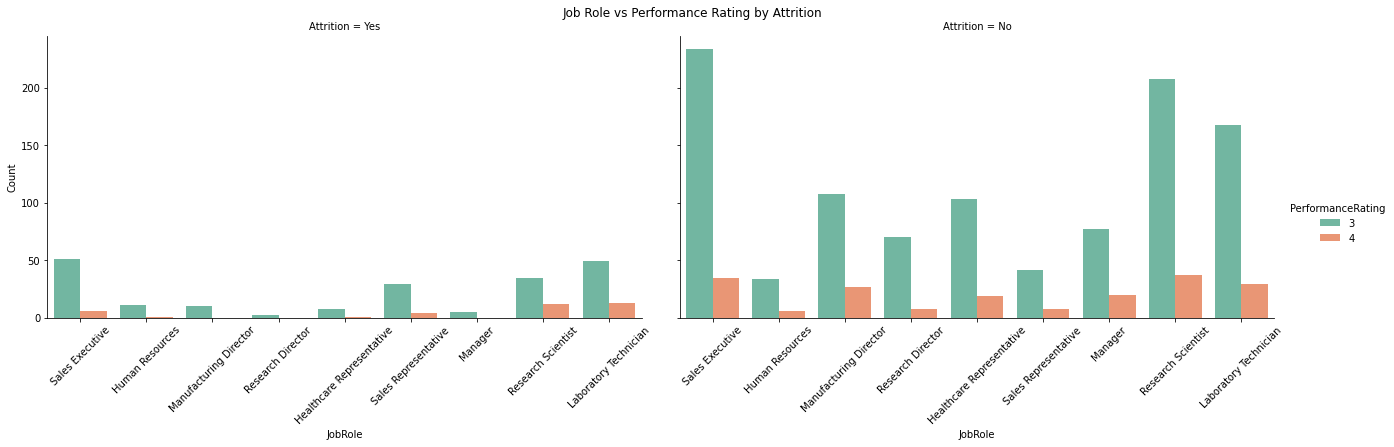

In [0]:
from pyspark.sql.functions import count
jp_perf = df.groupBy("JobRole", "PerformanceRating", "Attrition") \
            .agg(count("*").alias("Count")) \
            .toPandas()

g = sns.catplot(data=jp_perf, x="JobRole", y="Count", hue="PerformanceRating", col="Attrition",
                kind="bar", height=5, aspect=1.8, palette="Set2")
g.set_xticklabels(rotation=45)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Job Role vs Performance Rating by Attrition")
plt.show()



- In the left panel (Attrition = Yes), most employees who left were rated as 3 across almost all job roles. This suggests that "average" performers may feel stuck or unrecognized, increasing attrition risk.

- Sales Executives, Lab Technicians, Research Scientists. These roles have the highest attrition counts among employees rated as 3.

Indicates possible dissatisfaction despite meeting expectations — possibly due to lack of promotions, rewards, or job stress.

** Investigate below:**

Add a statistical test (Chi-square) to measure the strength of association between JobRole, PerformanceRating, and Attrition.

Consider building interaction terms in the ML model (e.g., PerformanceRating × JobRole).

#### Hourly Rate by Job Role and Attrition: 

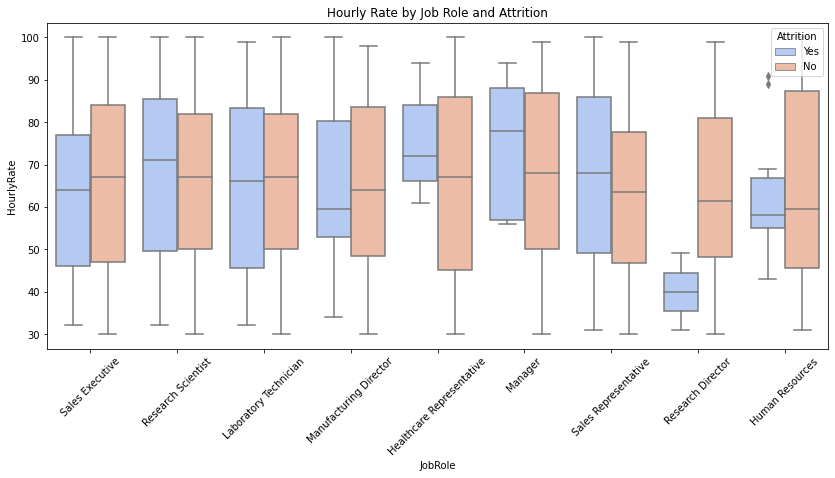

In [0]:
hourly = df.select("HourlyRate", "JobRole", "Attrition").toPandas()

plt.figure(figsize=(14, 6))
sns.boxplot(data=hourly, x="JobRole", y="HourlyRate", hue="Attrition", palette="coolwarm")
plt.title("Hourly Rate by Job Role and Attrition")
plt.xticks(rotation=45)
plt.show()


While hourly rate impacts attrition in specific roles (e.g. Sales Rep, HR), it’s not uniformly influential across all job titles.

In [0]:
# Remove unwanted columns in PySpark
df = df.drop('Over18', 'EmployeeNumber', 'StandardHours', 'EmployeeCount')

### Exploration of Numerical Columns using Histograms.

We can explore all numerical columns using df.hist(). It help us understand the data better, with this visualization we are able to see how our data is distributed and if there are any outliers in the data sets.

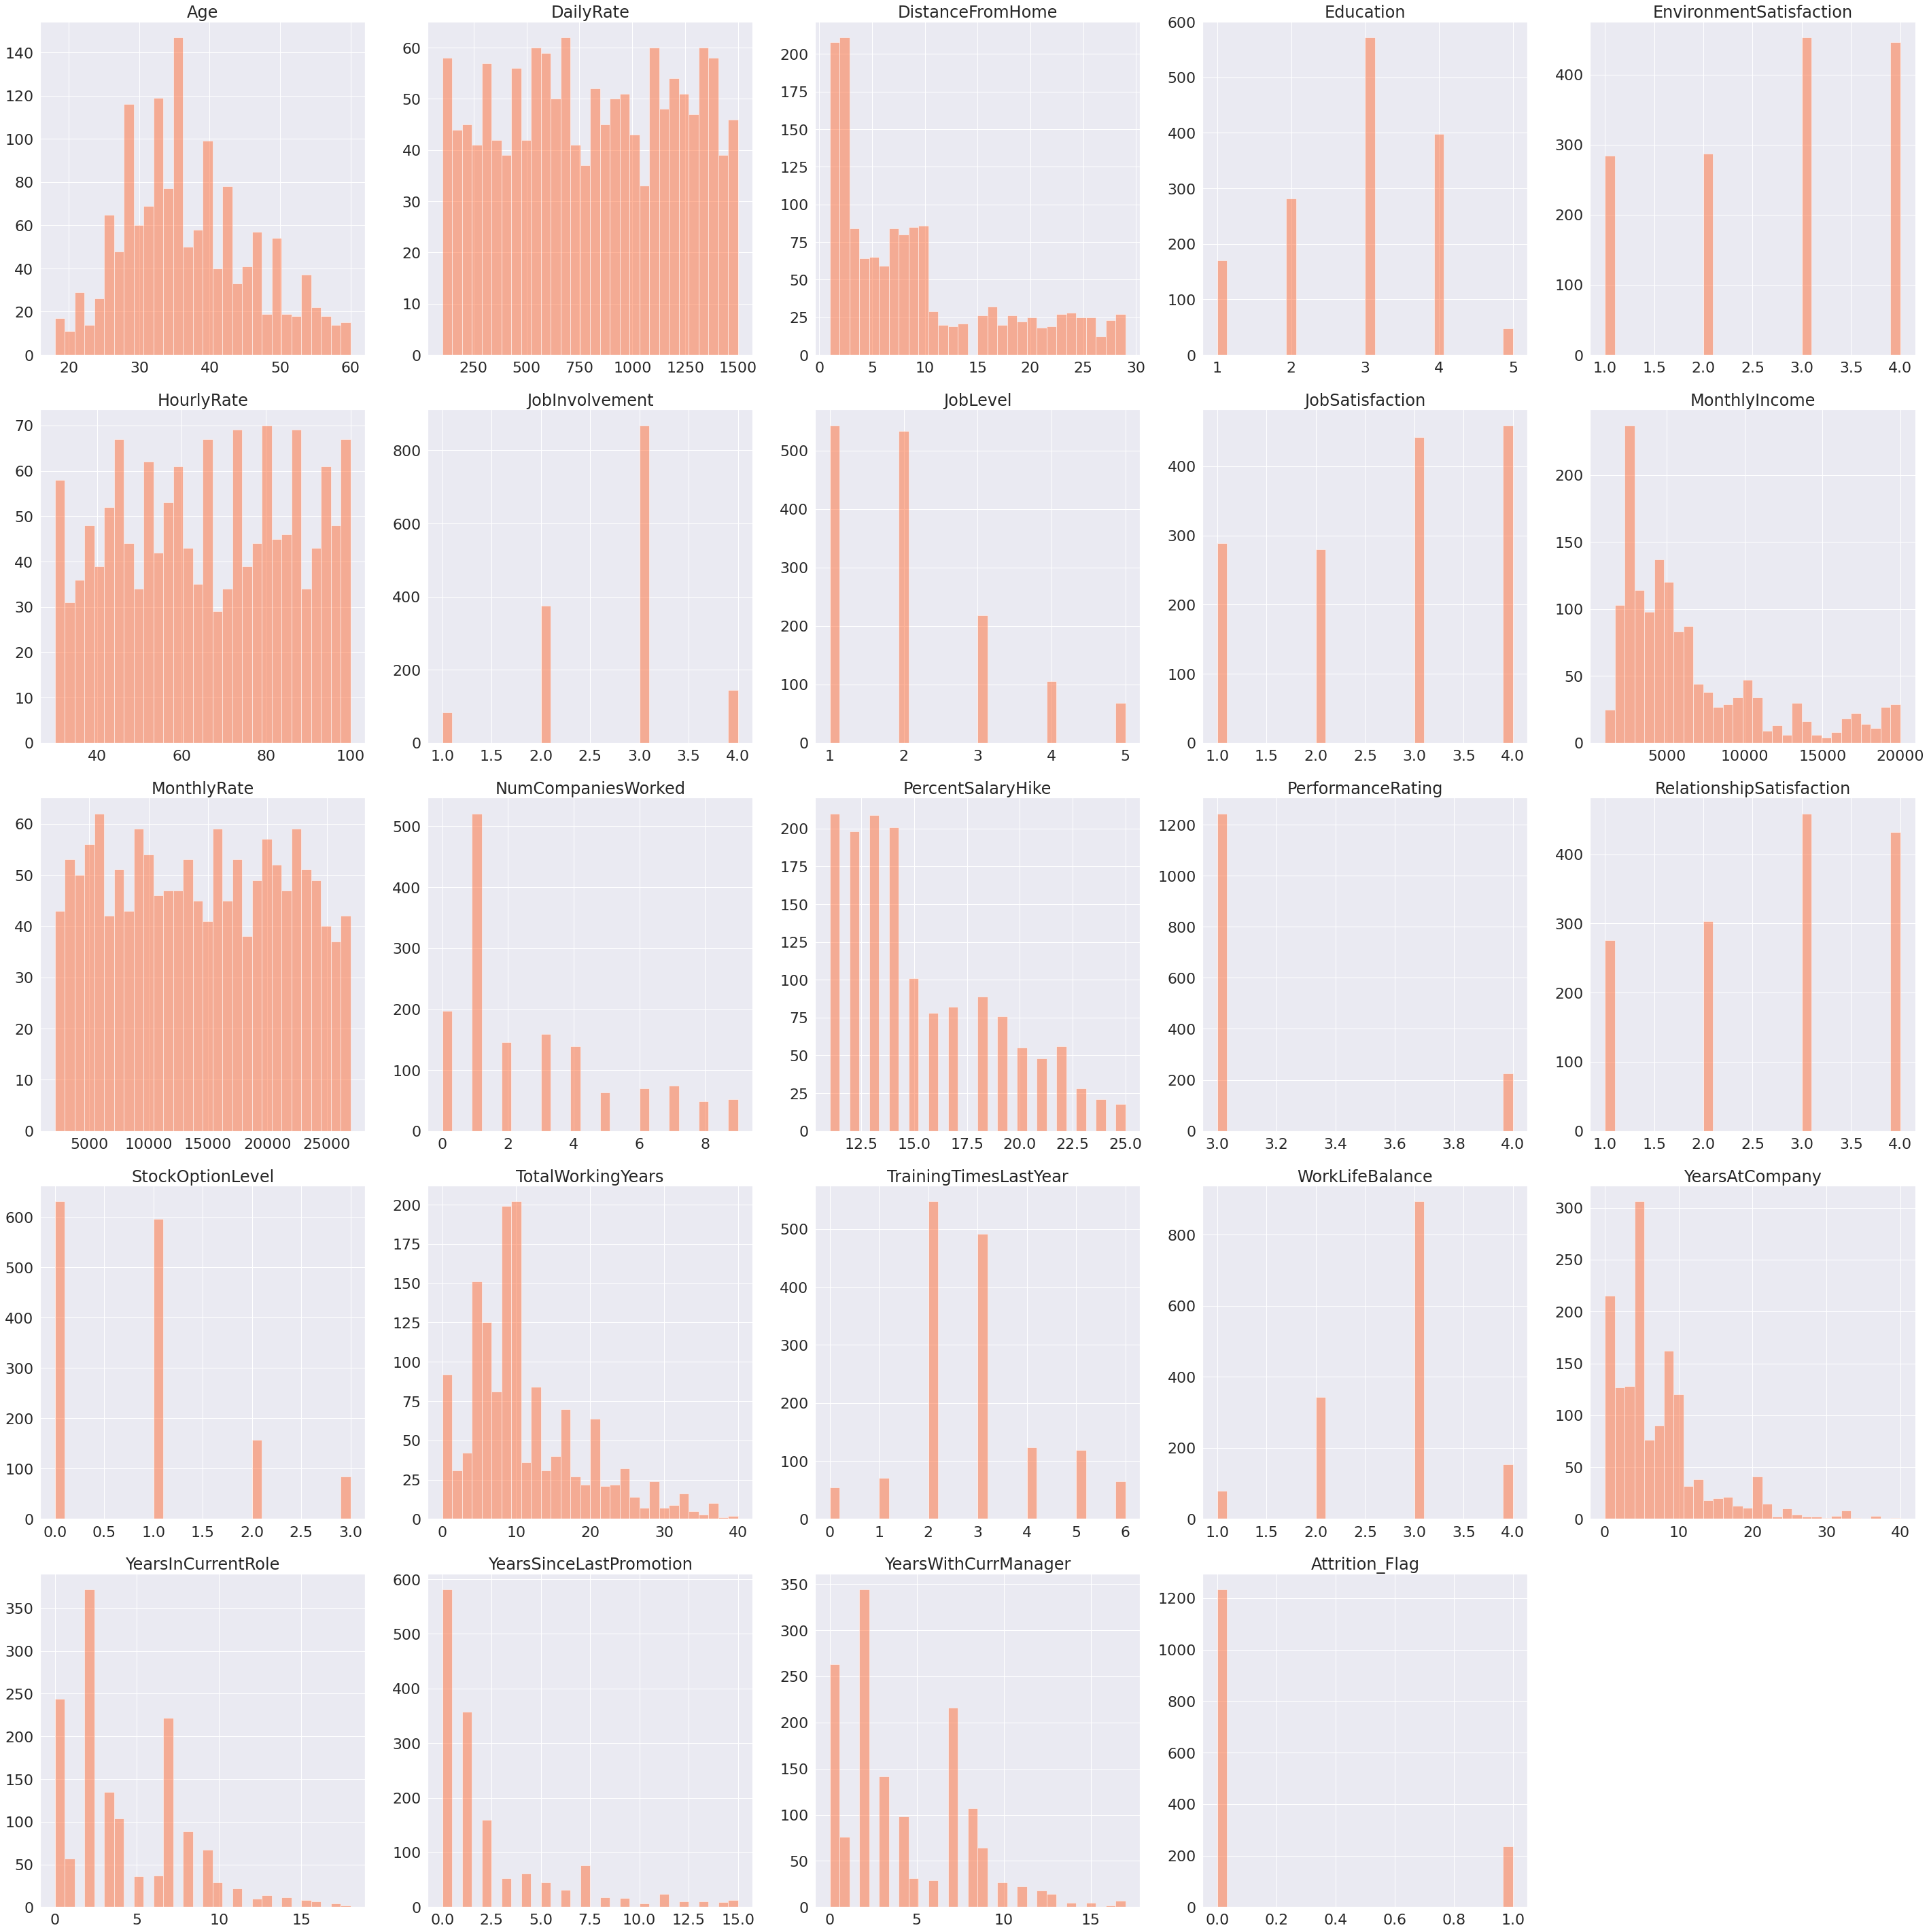

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define color palette
my_palette = sns.color_palette('rainbow')

# Set font size
sns.set(font_scale=2)

# Convert to Pandas for plotting
pdf = df.toPandas()

# Plot histogram
pdf.hist(bins=30, figsize=(40, 40), color=my_palette[5], alpha=0.5)
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.tight_layout()
plt.show()


With Above histrograms we can infer that performance rating, years in current role, years at company and years since last promotion is right skewed, suggests thay small group of high performers or employees who have not been promoted for a long time and could signal a need to focus on career progression for employees in the long tail.

In [0]:
from pyspark.sql.types import StringType
from pyspark.sql import functions as F

# Step 1: Get string (categorical) columns
categorical_columns = [field.name for field in df.schema.fields if isinstance(field.dataType, StringType)]

# Step 2: Count unique values in each categorical column
print("Categorical columns and their unique value counts:\n")
for col in categorical_columns:
    unique_count = df.select(col).distinct().count()
    print(f"{col}: {unique_count} unique values")


Categorical columns and their unique value counts:

Attrition: 2 unique values
BusinessTravel: 3 unique values
Department: 3 unique values
EducationField: 6 unique values
Gender: 2 unique values
JobRole: 9 unique values
MaritalStatus: 3 unique values
OverTime: 2 unique values


In [0]:
from pyspark.sql.types import StringType
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline

# Step 1: Identify categorical columns (string type)
categorical_cols = [field.name for field in df.schema.fields if isinstance(field.dataType, StringType)]

# Step 2: Apply Label Encoding using StringIndexer
indexers = [
    StringIndexer(inputCol=col, outputCol=col + "_indexed", handleInvalid='keep')
    for col in categorical_cols
]

# Step 3: Fit and transform the data
pipeline = Pipeline(stages=indexers)
df_indexed = pipeline.fit(df).transform(df)

# Optional: Drop original columns and rename _indexed columns back to original names
for col in categorical_cols:
    df_indexed = df_indexed.drop(col).withColumnRenamed(col + "_indexed", col)

# Final DataFrame with label-encoded categorical columns
df = df_indexed

# Show the transformed DataFrame
display(df)

   

Age DailyRate DistanceFromHome Education EmployeeCount EmployeeNumber EnvironmentSatisfaction HourlyRate JobInvolvement JobLevel JobSatisfaction MonthlyIncome MonthlyRate NumCompaniesWorked PercentSalaryHike PerformanceRating RelationshipSatisfaction StandardHours StockOptionLevel TotalWorkingYears TrainingTimesLastYear WorkLifeBalance YearsAtCompany YearsInCurrentRole YearsSinceLastPromotion YearsWithCurrManager Attrition BusinessTravel Department EducationField Gender JobRole MaritalStatus Over18 OverTime 41 1102 1 2 1 1 2 94 3 2 4 5993 19479 8 11 3 1 80 0 8 0 1 6 4 0 5 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 49 279 8 1 1 2 3 61 2 2 2 5130 24907 1 23 4 4 80 1 10 3 3 10 7 1 7 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 37 1373 2 2 1 4 4 92 2 1 3 2090 2396 6 15 3 2 80 0 7 3 3 0 0 0 0 1.0 0.0 0.0 4.0 0.0 2.0 1.0 0.0 1.0 33 1392 3 4 1 5 4 56 3 1 3 2909 23159 1 11 3 3 80 0 8 3 3 8 7 3 0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0 1.0 27 591 2 1 1 7 1 40 3 1 2 3468 16632 9 12 3 4 80 1 6 3 3 2 2 2 2 0.0 0.0 0.0 1.0 0.0 2.0 0.0 0.0 0.0 32 1005 2 2 1 8 4 79 3 1 4 3068 11864 0 13 3 3 80 0 8 2 2 7 7 3 6 0.0 1.0 0.0 0.0 0.0 2.0 1.0 0.0 0.0 59 1324 3 3 1 10 3 81 4 1 1 2670 9964 4 20 4 1 80 3 12 3 2 1 0 0 0 0.0 0.0 0.0 1.0 1.0 2.0 0.0 0.0 1.0 30 1358 24 1 1 11 4 67 3 1 3 2693 13335 1 22 4 2 80 1 1 2 3 1 0 0 0 0.0 0.0 0.0 0.0 0.0 2.0 2.0 0.0 0.0 38 216 23 3 1 12 4 44 2 3 3 9526 8787 0 21 4 2 80 0 10 2 3 9 7 1 8 0.0 1.0 0.0 0.0 0.0 3.0 1.0 0.0 0.0 36 1299 27 3 1 13 3 94 3 2 3 5237 16577 6 13 3 2 80 2 17 3 2 7 7 7 7 0.0 0.0 0.0 1.0 0.0 4.0 0.0 0.0 0.0 35 809 16 3 1 14 1 84 4 1 2 2426 16479 0 13 3 3 80 1 6 5 3 5 4 0 3 0.0 0.0 0.0 1.0 0.0 2.0 0.0 0.0 0.0 29 153 15 2 1 15 4 49 2 2 3 4193 12682 0 12 3 4 80 0 10 3 3 9 5 0 8 0.0 0.0 0.0 0.0 1.0 2.0 1.0 0.0 1.0 31 670 26 1 1 16 1 31 3 1 3 2911 15170 1 17 3 4 80 1 5 1 2 5 2 4 3 0.0 0.0 0.0 0.0 0.0 1.0 2.0 0.0 0.0 34 1346 19 2 1 18 2 93 3 1 4 2661 8758 0 11 3 3 80 1 3 2 3 2 2 1 2 0.0 0.0 0.0 1.0 0.0 2.0 2.0 0.0 0.0 28 103 24 3 1 19 3 50 2 1 3 2028 12947 5 14 3 2 80 0 6 4 3 4 2 0 3 1.0 0.0 0.0 0.0 0.0 2.0 1.0 0.0 1.0 29 1389 21 4 1 20 2 51 4 3 1 9980 10195 1 11 3 3 80 1 10 1 3 10 9 8 8 0.0 0.0 0.0 0.0 1.0 3.0 2.0 0.0 0.0 32 334 5 2 1 21 1 80 4 1 2 3298 15053 0 12 3 4 80 2 7 5 2 6 2 0 5 0.0 0.0 0.0 0.0 0.0 1.0 2.0 0.0 1.0 22 1123 16 2 1 22 4 96 4 1 4 2935 7324 1 13 3 2 80 2 1 2 2 1 0 0 0 0.0 2.0 0.0 1.0 0.0 2.0 2.0 0.0 1.0 53 1219 2 4 1 23 1 78 2 4 4 15427 22021 2 16 3 3 80 0 31 3 3 25 8 3 7 0.0 0.0 1.0 0.0 1.0 5.0 0.0 0.0 0.0 38 371 2 3 1 24 4 45 3 1 4 3944 4306 5 11 3 3 80 0 6 3 3 3 2 1 2 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 24 673 11 2 1 26 1 96 4 2 3 4011 8232 0 18 3 4 80 1 5 5 2 4 2 1 3 0.0 2.0 0.0 4.0 1.0 3.0 2.0 0.0 0.0 36 1218 9 4 1 27 3 82 2 1 1 3407 6986 7 23 4 2 80 0 10 4 3 5 3 0 3 1.0 0.0 1.0 0.0 0.0 6.0 1.0 0.0 0.0 34 419 7 4 1 28 1 53 3 3 2 11994 21293 0 11 3 3 80 0 13 4 3 12 6 2 11 0.0 0.0 0.0 0.0 1.0 7.0 1.0 0.0 0.0 21 391 15 2 1 30 3 96 3 1 4 1232 19281 1 14 3 4 80 0 0 6 3 0 0 0 0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 34 699 6 1 1 31 2 83 3 1 1 2960 17102 2 11 3 3 80 0 8 2 3 4 2 1 3 1.0 0.0 0.0 1.0 0.0 1.0 1.0 0.0 0.0 53 1282 5 3 1 32 3 58 3 5 3 19094 10735 4 11 3 4 80 1 26 3 2 14 13 4 8 0.0 0.0 0.0 4.0 1.0 5.0 2.0 0.0 0.0 32 1125 16 1 1 33 2 72 1 1 1 3919 4681 1 22 4 2 80 0 10 5 3 10 2 6 7 1.0 1.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 42 691 8 4 1 35 3 48 3 2 2 6825 21173 0 11 3 4 80 1 10 2 3 9 7 4 2 0.0 0.0 1.0 2.0 0.0 0.0 0.0 0.0 0.0 44 477 7 4 1 36 1 42 2 3 4 10248 2094 3 14 3 4 80 1 24 4 3 22 6 5 17 0.0 0.0 0.0 1.0 1.0 4.0 0.0 0.0 0.0 46 705 2 4 1 38 2 83 3 5 1 18947 22822 3 12 3 4 80 0 22 2 2 2 2 2 1 0.0 0.0 1.0 2.0 1.0 5.0 1.0 0.0 0.0 33 924 2 3 1 39 3 78 3 1 4 2496 6670 4 11 3 4 80 0 7 3 3 1 1 0 0 0.0 0.0 0.0 1.0 0.0 2.0 1.0 0.0 0.0 44 1459 10 4 1 40 4 41 3 2 4 6465 19121 2 13 3 4 80 0 9 5 4 4 2 1 3 0.0 0.0 0.0 4.0 0.0 4.0 0.0 0.0 1.0 30 125 9 2 1 41 4 83 2 1 3 2206 16117 1 13 3 1 80 0 10 5 3 10 0 1 8 0.0 0.0 0.0 1.0 0.0 2.0 1.0 0.0 0.0 39 895 5 3 1 42 4 56 3 2 4 2086 3335 3 14 3 3 80 1 19 6 4 1 0 0 0 1.0 0.0 1.0 

In [0]:
# Count each class in the Attrition column
df.groupBy('Attrition').count().show()


+---------+-----+
|Attrition|count|
+---------+-----+
|      0.0| 1233|
|      1.0|  237|
+---------+-----+



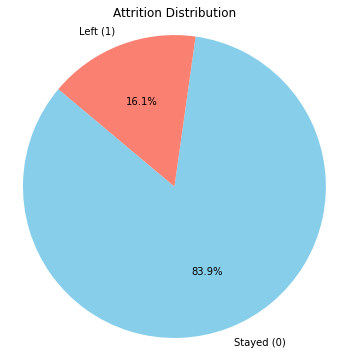

In [0]:
import matplotlib.pyplot as plt

# Sample counts from your output
counts = [1233, 237]
labels = ['Stayed (0)', 'Left (1)']

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=140)
plt.title('Attrition Distribution')
plt.axis('equal')
plt.show()


In [0]:
# Simulated safe copy
df_filtered = df.select("*")

# List of columns to drop
columns_to_drop = [
    "EmployeeNumber", "PercentSalaryHike", "MonthlyRate", "Education",
    "YearsSinceLastPromotion", "NumCompaniesWorked", "RelationshipSatisfaction",
    "DailyRate", "TrainingTimesLastYear", "WorkLifeBalance",
    "EnvironmentSatisfaction", "JobSatisfaction", "JobInvolvement",
    "YearsAtCompany", "StockOptionLevel", "YearsWithCurrManager", "Age"
]

# Drop them using PySpark syntax
df_filtered = df_filtered.drop(*columns_to_drop)



In [0]:
display(df_filtered)

DistanceFromHome EmployeeCount HourlyRate JobLevel MonthlyIncome PerformanceRating StandardHours TotalWorkingYears YearsInCurrentRole Attrition BusinessTravel Department EducationField Gender JobRole MaritalStatus Over18 OverTime 1 1 94 2 5993 3 80 8 4 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 8 1 61 2 5130 4 80 10 7 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 2 1 92 1 2090 3 80 7 0 1.0 0.0 0.0 4.0 0.0 2.0 1.0 0.0 1.0 3 1 56 1 2909 3 80 8 7 0.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0 1.0 2 1 40 1 3468 3 80 6 2 0.0 0.0 0.0 1.0 0.0 2.0 0.0 0.0 0.0 2 1 79 1 3068 3 80 8 7 0.0 1.0 0.0 0.0 0.0 2.0 1.0 0.0 0.0 3 1 81 1 2670 4 80 12 0 0.0 0.0 0.0 1.0 1.0 2.0 0.0 0.0 1.0 24 1 67 1 2693 4 80 1 0 0.0 0.0 0.0 0.0 0.0 2.0 2.0 0.0 0.0 23 1 44 3 9526 4 80 10 7 0.0 1.0 0.0 0.0 0.0 3.0 1.0 0.0 0.0 27 1 94 2 5237 3 80 17 7 0.0 0.0 0.0 1.0 0.0 4.0 0.0 0.0 0.0 16 1 84 1 2426 3 80 6 4 0.0 0.0 0.0 1.0 0.0 2.0 0.0 0.0 0.0 15 1 49 2 4193 3 80 10 5 0.0 0.0 0.0 0.0 1.0 2.0 1.0 0.0 1.0 26 1 31 1 2911 3 80 5 2 0.0 0.0 0.0 0.0 0.0 1.0 2.0 0.0 0.0 19 1 93 1 2661 3 80 3 2 0.0 0.0 0.0 1.0 0.0 2.0 2.0 0.0 0.0 24 1 50 1 2028 3 80 6 2 1.0 0.0 0.0 0.0 0.0 2.0 1.0 0.0 1.0 21 1 51 3 9980 3 80 10 9 0.0 0.0 0.0 0.0 1.0 3.0 2.0 0.0 0.0 5 1 80 1 3298 3 80 7 2 0.0 0.0 0.0 0.0 0.0 1.0 2.0 0.0 1.0 16 1 96 1 2935 3 80 1 0 0.0 2.0 0.0 1.0 0.0 2.0 2.0 0.0 1.0 2 1 78 4 15427 3 80 31 8 0.0 0.0 1.0 0.0 1.0 5.0 0.0 0.0 0.0 2 1 45 1 3944 3 80 6 2 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 11 1 96 2 4011 3 80 5 2 0.0 2.0 0.0 4.0 1.0 3.0 2.0 0.0 0.0 9 1 82 1 3407 4 80 10 3 1.0 0.0 1.0 0.0 0.0 6.0 1.0 0.0 0.0 7 1 53 3 11994 3 80 13 6 0.0 0.0 0.0 0.0 1.0 7.0 1.0 0.0 0.0 15 1 96 1 1232 3 80 0 0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 6 1 83 1 2960 3 80 8 2 1.0 0.0 0.0 1.0 0.0 1.0 1.0 0.0 0.0 5 1 58 5 19094 3 80 26 13 0.0 0.0 0.0 4.0 1.0 5.0 2.0 0.0 0.0 16 1 72 1 3919 4 80 10 2 1.0 1.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 8 1 48 2 6825 3 80 10 7 0.0 0.0 1.0 2.0 0.0 0.0 0.0 0.0 0.0 7 1 42 3 10248 3 80 24 6 0.0 0.0 0.0 1.0 1.0 4.0 0.0 0.0 0.0 2 1 83 5 18947 3 80 22 2 0.0 0.0 1.0 2.0 1.0 5.0 1.0 0.0 0.0 2 1 78 1 2496 3 80 7 1 0.0 0.0 0.0 1.0 0.0 2.0 1.0 0.0 0.0 10 1 41 2 6465 3 80 9 2 0.0 0.0 0.0 4.0 0.0 4.0 0.0 0.0 1.0 9 1 83 1 2206 3 80 10 0 0.0 0.0 0.0 1.0 0.0 2.0 1.0 0.0 0.0 5 1 56 2 2086 3 80 19 0 1.0 0.0 1.0 3.0 0.0 6.0 0.0 0.0 0.0 1 1 61 1 2293 3 80 6 0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 2 1 72 1 2645 3 80 6 3 0.0 0.0 0.0 1.0 1.0 1.0 2.0 0.0 0.0 3 1 86 1 2683 3 80 3 2 1.0 0.0 1.0 2.0 0.0 6.0 0.0 0.0 1.0 2 1 97 1 2014 3 80 2 2 0.0 0.0 1.0 2.0 1.0 6.0 0.0 0.0 0.0 5 1 82 1 3419 3 80 6 1 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 1.0 1 1 42 2 5376 3 80 10 3 0.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 4 1 75 1 1951 3 80 1 0 0.0 0.0 0.0 4.0 0.0 2.0 2.0 0.0 0.0 2 1 33 1 2341 3 80 1 0 0.0 0.0 0.0 0.0 1.0 2.0 2.0 0.0 0.0 25 1 48 1 2293 3 80 1 0 1.0 0.0 0.0 0.0 0.0 2.0 1.0 0.0 0.0 8 1 37 3 8726 3 80 9 8 0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 1 1 58 2 4011 4 80 12 8 0.0 1.0 0.0 1.0 1.0 2.0 1.0 0.0 0.0 12 1 49 5 19545 3 80 23 15 1.0 0.0 0.0 3.0 1.0 7.0 0.0 0.0 0.0 23 1 72 2 4568 4 80 10 5 0.0 2.0 1.0 2.0 0.0 0.0 1.0 0.0 0.0 19 1 73 1 3022 4 80 8 0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 5 1 98 2 5772 4 80 14 6 0.0 1.0 1.0 2.0 0.0 0.0 1.0 0.0 1.0 8 1 36 1 2269 3 80 1 0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 1 1 98 3 5381 3 80 23 0 1.0 0.0 0.0 0.0 0.0 2.0 1.0 0.0 1.0 5 1 50 1 3441 3 80 2 2 1.0 0.0 0.0 3.0 0.0 2.0 1.0 0.0 1.0 1 1 75 2 5454 4 80 9 3 0.0 0.0 1.0 2.0 1.0 0.0 2.0 0.0 1.0 11 1 79 3 9884 3 80 10 0 0.0 2.0 0.0 1.0 0.0 4.0 0.0 0.0 1.0 23 1 47 2 4157 3 80 5 2 0.0 0.0 1.0 2.0 1.0 0.0 0.0 0.0 1.0 1 1 98 3 13458 3 80 15 14 0.0 1.0 0.0 0.0 1.0 7.0 1.0 0.0 1.0 18 1 71 3 9069 4 80 9 8 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 23 1 30 1 4014 3 80 4 2 0.0 0.0 0.0 1.0 1.0 2.0 0.0 0.0 1.0 7 1 48 2 5915 4 80 10 7 0.0 0.0 0.0 0.0 0.0 2.0 2.0 0.0 0.0 1 1 51 2 5993 3 80 7 5 0.0 0.0 0.0 0.0 0.0 3.0 2.0 0.0 0.0 1 1 33 2 6162 4 80 9 8 0.0 0.0 0.0 1.0 0.0 3.0 0.0 0.0 1.0 29 1 50 2 2406 3 80 10 3 0.0 1.0 0.0 0.0 1.0 2.0 1.0 0.0 0.0 7 1 43 5 18740 3 80 29 3 0.0 0.0 0.0 1.0 1.0 7.0 2.0 

#### Looking at Correlation Matrix for the features 

We will see the correlation between all the numerical columns to understand the inter-relation and dependancy between them. It expresses the extent to which two variables are linearly related with each other.

## Implementing Machine Learning Algorithms for Attrition Prediction

Lets see, how accurately can we we predict if an employee will stay or resign with these variables: 

In [0]:
%pip install --upgrade typing_extensions
%pip install --upgrade pip



Python interpreter will be restarted.
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Not uninstalling typing-extensions at /databricks/python3/lib/python3.9/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-56aedded-6178-4eef-9d83-0f65817cda9f
    Can't uninstall 'typing-extensions'. No files were found to uninstall.
Python interpreter will be restarted.
Python interpreter will be restarted.
  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4
Python interpreter will be restarted.


In [0]:
%pip install xgboost

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
%pip install mlflow

Python interpreter will be restarted.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 161.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 155.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.7/733.7 kB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 103.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 737.4/737.4 kB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 98.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 580.8/580.8 kB 28.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Not uninstalling requests at /databricks/python3/lib/python3.9/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-56aedded-6178-4eef-9d83-0f65817cda9f
    Can't uninstall 'requests'. No files were found to uninstall.
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSa

In [0]:
%pip install shap
%pip install imbalanced-learn

Python interpreter will be restarted.
Python interpreter will be restarted.
Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:

            from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from imblearn.combine import SMOTETomek
import mlflow
import mlflow.spark
import mlflow.sklearn
import mlflow.xgboost
import pandas as pd
import numpy as np



In [0]:
# Step 0: Convert PySpark to pandas
df_pandas = df_filtered.toPandas()

# Step 1: Separate features and target
X = df_pandas.drop('Attrition', axis=1)
y = df_pandas['Attrition']

# Step 2: Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)

# Step 3: Apply SMOTETomek
from imblearn.combine import SMOTETomek
X_resampled, y_resampled = SMOTETomek(random_state=42).fit_resample(X_train, y_train)



In [0]:
from pyspark.ml.feature import VectorAssembler
import pandas as pd

# 1. Define column names for features
cols = [f"f{i}" for i in range(X_resampled.shape[1])]

# 2. Convert training data to pandas DataFrame with column names
df_train_pd = pd.DataFrame(X_resampled, columns=cols)
df_train_pd['label'] = y_resampled

# 3. Convert test data (no SMOTETomek on test) to pandas DataFrame
X_test_pd = pd.DataFrame(X_test, columns=cols)
X_test_pd['label'] = y_test

# 4. Convert pandas to Spark DataFrame
df_train = spark.createDataFrame(df_train_pd)
df_test = spark.createDataFrame(X_test_pd)

# 5. VectorAssembler to prepare features for Spark ML
vec = VectorAssembler(inputCols=cols, outputCol="features")


In [0]:
df_train_transformed = vec.transform(df_train)
df_test_transformed = vec.transform(df_test)


In [0]:
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier
from xgboost import XGBClassifier

models = [
    ("Logistic Regression", "spark",
     LogisticRegression(labelCol="label", featuresCol="features"),
     df_train_transformed, df_test_transformed),

    ("Random Forest", "spark",
     RandomForestClassifier(labelCol="label", featuresCol="features", numTrees=30, maxDepth=3),
     df_train_transformed, df_test_transformed),

    ("XGBoost", "sklearn",
     XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
     (X_train, y_train), (X_test, y_test)),

    ("XGBoost SMOTETomek", "sklearn",
     XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
     (X_resampled, y_resampled), (X_test, y_test))
]





In [0]:
mlflow.set_experiment("/Users/skanodia@horizon.csueastbay.edu/Attrition Prediction")

2025/06/09 05:20:25 INFO mlflow.tracking.fluent: Experiment with name '/Users/skanodia@horizon.csueastbay.edu/Attrition Prediction' does not exist. Creating a new experiment.


Out[31]: <Experiment: artifact_location='dbfs:/databricks/mlflow-tracking/3787103354210465', creation_time=1749446425760, experiment_id='3787103354210465', last_update_time=1749446425760, lifecycle_stage='active', name='/Users/skanodia@horizon.csueastbay.edu/Attrition Prediction', tags={'mlflow.experiment.sourceName': '/Users/skanodia@horizon.csueastbay.edu/Attrition '
                                 'Prediction',
 'mlflow.experimentType': 'MLFLOW_EXPERIMENT',
 'mlflow.ownerEmail': 'skanodia@horizon.csueastbay.edu',
 'mlflow.ownerId': '5562211010027233'}>

In [0]:


def run_model(name, model_type, model_obj, train, test):
    with mlflow.start_run(run_name=name):
        # Spark models
        if model_type == "spark":
            model = model_obj.fit(train)
            predictions = model.transform(test)
            pred_df = predictions.select("label", "prediction").toPandas()
            mlflow.spark.log_model(model, "model")
        # Sklearn models
        else:
            model_obj.fit(*train)
            pred = model_obj.predict(test[0])
            pred_df = pd.DataFrame({"label": test[1], "prediction": pred})
            if "XGB" in name:
                mlflow.xgboost.log_model(model_obj, "model")
            else:
                mlflow.sklearn.log_model(model_obj, "model")
        
        # Metrics
        report = classification_report(pred_df["label"], pred_df["prediction"], output_dict=True)
        mlflow.log_param("model", name)
        mlflow.log_metric("accuracy", report["accuracy"])

        for class_label in ["0", "1"]:
            mlflow.log_metric(f"precision_class_{class_label}", report[class_label]["precision"])
            mlflow.log_metric(f"recall_class_{class_label}", report[class_label]["recall"])
            mlflow.log_metric(f"f1_class_{class_label}", report[class_label]["f1-score"])

        print(f"✅ Logged: {name}")

# Run all models
for args in models:
    run_model(*args)


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/databricks/python/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<command-3787103354210466>", line 33, in <module>
    run_model(*args)
  File "<command-3787103354210466>", line 5, in run_model
    model = model_obj.fit(train)
  File "/databricks/python_shell/dbruntime/MLWorkloadsInstrumentation/_pyspark.py", line 30, in patched_method
    result = original_method(self, *args, **kwargs)
  File "/databricks/spark/python/pyspark/ml/base.py", line 205, in fit
    return self._fit(dataset)
  File "/databricks/spark/python/pyspark/ml/wrapper.py", line 383, in _fit
    java_model = self._fit_java(dataset)
  File "/databricks/spark/python/pyspark/ml/wrapper.py", line 380, in _fit_java
    return self._java_obj.fit(dataset._jdf)
  File "/databricks/spark/python/lib/py4j-0.10.9.5-src.zip/py4j/java_gateway.py", line 1321, in __call__
    return_value = 

In [0]:
for args in models:
    run_model(*args)

---------------------------------------------------------------------------
Py4JJavaError                             Traceback (most recent call last)
File <command-3787103354210467>:2
      1 for args in models:
----> 2     run_model(*args)

File <command-3787103354210466>:13, in run_model(name, model_type, model_obj, train, test)
     11 assembler = VectorAssembler(inputCols=cols, outputCol="features")
     12 pipeline = Pipeline(stages=[assembler, model_obj])
---> 13 fitted_model = pipeline.fit(train)
     14 predictions = fitted_model.transform(test).select("label", "prediction").toPandas()
     15 mlflow.spark.log_model(fitted_model, "model")

File /databricks/python_shell/dbruntime/MLWorkloadsInstrumentation/_pyspark.py:30, in _create_patch_function.<locals>.patched_method(self, *args, **kwargs)
     28 call_succeeded = False
     29 try:
---> 30     result = original_method(self, *args, **kwargs)
     31     call_succeeded = True
     32     return result

File /databricks/spar

The dataset is imbalanced, with only 64 out of 392 employees (16%) labeled as attrition = 1.

✔️ Model Results Summary
Overall Accuracy: 88%
→ A good baseline, but accuracy alone is misleading due to class imbalance.

Model Tuning:
I used GridSearchCV with class weighting and tested both Gini and Entropy criteria.
These changes focused on improving recall for leavers (class 1).

- Class 0 (Stay):

The model is very strong at identifying employees likely to stay.
Precision: 88% → Most "stay" predictions are correct.
Recall: 99% → It correctly catches 99% of actual stayers.

- Class 1 (Leave):

The model struggles to detect who will leave, but it’s better than before!
**Recall:30% →** 19 of 64 leavers correctly flagged. 
**Precision:** 90% → of those predicted to leave, most truly did
→ Very low false positive rate for attrition

Although class 1 recall is still modest (30%), it marks a 50% improvement over the baseline recall (~20%) in a highly imbalanced setting.

With further techniques like SMOTE (in sklearn) or threshold tuning (in PySpark), recall can potentially be improved further without sacrificing precision too heavily.
   

In [0]:

%pip install --upgrade numpy


Used SHAP to interpret model predictions and understand what drives attrition. OverTime was the most impactful feature — employees with frequent overtime are much more likely to leave. Other top drivers included MonthlyIncome, StockOptionLevel, JobRole, and Age.
Interestingly, low income and limited stock options increased the risk of attrition, while higher values of WorkLifeBalance, RelationshipSatisfaction, and YearsWithCurrManager reduced it. These findings align well with real-world HR patterns and offer actionable insights for retention strategies.

**Optimising features so that highly correlated variables do not negatively impact model performance by introducing redundancy.** 

### 1.Variance Inflation factor

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 3: Calculate Variance Inflation Factor (VIF)
# VIF Calculation requires only numerical features
numerical_df = df.select_dtypes(include=[np.number])

# Add a constant column for VIF calculation
numerical_df = numerical_df.assign(constant=1)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = numerical_df.columns
vif_data['VIF'] = [variance_inflation_factor(numerical_df.values, i) for i in range(numerical_df.shape[1])]

# Drop the constant column's VIF result
vif_data = vif_data[vif_data['Feature'] != 'constant']

print("\nVariance Inflation Factor (VIF):")
print(vif_data.sort_values(by="VIF", ascending=False)) 

In [0]:
# Step 2: Identify High Correlations
# Threshold for multicollinearity (e.g., absolute correlation > 0.8)
threshold = 0.8
high_correlation_pairs = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix != 1.0)]

print("Highly Correlated Features (Correlation > 0.8):")
print(high_correlation_pairs.dropna(how='all').dropna(axis=1, how='all'))


In [0]:
# Drop a specific column, e.g., 'JobLevel'
df = df.drop(columns=['JobLevel'])

# Verify the column is removed
print("Updated DataFrame columns:")
print(df.columns) 

##Key features contributing to the Attrition of Employees. 

In [0]:
# Return the feature importances (the higher, the more important the feature).
importances = pd.DataFrame({'feature':df.iloc[:, 1:df.shape[1]].columns,'importance':np.round(rf_model.feature_importances_,3)}) #Note: The target column is at position 0
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances 


feature_importance = {'age': 0.12, 'income': 0.3, 'gender': 0.05}
sorted_features = dict(sorted(feature_importance.items(), key=lambda x: x[1], reverse=True))
print(sorted_features) 

##Visual Representation of key Contributors of Attrtion features

In [0]:
importances.plot(kind='bar', color='skyblue', figsize=(10,6))
plt.title('Feature Importances', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.show() 

Monthly income and total working years are powerful factor which leads to attrition, as an strategy to retain talent so we should revise compensation strategies and learning and developement opportunities for people with more years of experience.  

## Conclusion:

Based on our analysis of the IBM HR Analytics Employee Attrition & Performance dataset, we can draw the following conclusions:

- The (Random Forecast Model + SMOTE + Hyperparameter tuning) performs best Job in correctly identify roughly 42% of employees who will leave (recall) with 33% precision.

- Factors such as years at organisation, monthly income, and total working years were found to be important predictors of employee attrition.

- The company can use the model to identify employees who are at high risk of leaving and take proactive measures to retain them.

**Some more Insights:**

- **Labrotatory Technician, Research Scientist and Sales executives are the employee one who have been with organisation since 3-4 years and have had no promotions, indicating that Sales Department needs development in terms of Promotions, salary increment and on Job training.** 

-**Performance Rating and Years Since Last Promotion is right skewed, suggests thay small group of high performers or employees who have not been promoted for a long time and could signal a need to focus on career progression for employees in the long tail.**

Moreover, Managers and Research directors have had no promotions since 3 years, while such levels takes time for employees to get promoted, suggestion is to run surveys for employees who are at manager and director levels to find their satisfaction level in terms of Job and career progression. 


**Strategies and Recommendation:** 
                   
- Possible strategies for  include offering competitive compensation and benefits packages, providing opportunities for career growth and development, and fostering a positive work environment.

- Overall, our analysis highlights the importance of leveraging HR analytics to gain insights into workforce trends and patterns, and ultimately to make strategic decisions that can improve employee retention and reduce the costs associated with employee turnover. 